In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [34]:
tt = pd.read_csv('../Data/weighted_tt.csv', index_col = 0)
tt.head()

,geoid,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,...,CBD16,CBD17,CBD18,CBD19,CBD20,CBD21,CBD22,w_tt,mean_tt,min_tt
0,36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,...,23.0,27.0,25.0,15.0,19.0,13.0,38.0,18.237742,25.409091,3.0
1,36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,...,20.0,27.0,22.0,22.0,19.0,17.0,38.0,16.932766,24.545455,10.0
2,36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,...,21.0,28.0,22.0,27.0,22.0,17.0,39.0,18.211283,25.045455,12.0
3,36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,...,15.0,18.0,19.0,18.0,21.0,16.0,43.0,13.227767,19.863636,7.0
4,36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,...,32.0,36.0,36.0,11.0,17.0,6.0,51.0,28.875500,31.590909,6.0


In [35]:
tt[tt['mean_tt'].isna()]

,geoid,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,...,CBD16,CBD17,CBD18,CBD19,CBD20,CBD21,CBD22,w_tt,mean_tt,min_tt
773,36047085200,852.00,3,Brooklyn,85200,3085200,I,BK99,park-cemetery-etc-Brooklyn,4010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1145,36081023200,232.00,4,Queens,23200,4023200,I,QN35,Briarwood-Jamaica Hills,4106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1412,36081091601,916.01,4,Queens,91601,4091601,I,QN10,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,4114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1561,36047017500,175.00,3,Brooklyn,17500,3017500,I,BK99,park-cemetery-etc-Brooklyn,4012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [48]:
tt.columns

Index(['index', 'geoid', 'ctlabel', 'boro_code', 'boro_name', 'ct2010',
       'boro_ct2010', 'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng',
       'shape_area', 'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count',
       'Subway_Count', 'Center_Lat', 'Center_Lon', 'area_km2', 'formatted',
       'CBD1', 'CBD2', 'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9',
       'CBD10', 'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17',
       'CBD18', 'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt',
       'min_tt'],
      dtype='object')

In [36]:
tt = tt[~tt['mean_tt'].isna()].reset_index()
tt.to_csv('../Data/weighted_tt_dropna.csv')

In [37]:
len(tt)

2037

In [9]:
N = len(tt)
diff_weighted_mat = np.zeros((N,N))
diff_mean_mat = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        diff_weighted_mat[i,j] = abs(tt['w_tt'][i]-tt['w_tt'][j])
        diff_mean_mat[i,j] = abs(tt['mean_tt'][i]-tt['mean_tt'][j])

In [10]:
diff_weighted_mat[0,:100]

array([0.00000000e+00, 1.30497671e+00, 2.64591870e-02, 5.00997528e+00,
       1.06377571e+01, 1.28982742e+01, 1.72335534e+01, 1.85731047e+01,
       2.49676207e+01, 7.96686884e+00, 3.53800255e+01, 3.24532084e+01,
       2.23872002e+01, 2.38421596e+01, 2.86989460e+01, 2.74992338e+01,
       2.87546195e+01, 3.07546195e+01, 1.92710950e+01, 1.82508182e+01,
       1.72860407e+01, 1.72860407e+01, 2.16567983e+01, 3.76701209e+01,
       3.62262498e+01, 3.35998302e+01, 3.40414711e+01, 1.84838167e+01,
       3.78900223e+01, 4.02341610e+01, 4.28043816e+01, 2.98278025e+01,
       2.69204033e+01, 1.97797973e+01, 3.18364160e+01, 3.07062269e+01,
       3.07604602e+01, 3.18373739e+01, 1.84702772e+01, 3.65286197e+01,
       1.75787761e+01, 3.28346650e+01, 3.76669270e+01, 3.61462620e+01,
       2.25753721e+01, 3.96714055e+01, 2.33873449e+01, 1.98509184e+01,
       4.17130894e+01, 4.22262498e+01, 1.84332479e+01, 3.37862724e+01,
       2.73319827e+01, 3.65869319e+01, 3.65869319e+01, 2.31683443e+01,
      

In [11]:
diff_mean_mat[0,:100]

array([ 0.        ,  0.86363636,  0.36363636,  5.54545455,  6.18181818,
        8.54545455, 11.86363636, 17.54545455, 22.09090909,  6.22727273,
       32.36363636, 29.45454545, 19.5       , 21.5       , 26.31818182,
       24.68181818, 26.45454545, 28.45454545, 16.36363636, 15.59090909,
       14.90909091, 14.90909091, 18.95454545, 36.59090909, 34.77272727,
       31.90909091, 32.13636364, 13.59090909, 36.45454545, 38.77272727,
       39.40909091, 27.54545455, 25.54545455, 15.09090909, 30.31818182,
       29.09090909, 29.18181818, 30.04545455, 15.31818182, 33.72727273,
       14.95454545, 30.59090909, 35.36363636, 33.45454545, 17.77272727,
       37.40909091, 20.90909091, 17.95454545, 40.13636364, 40.77272727,
       16.13636364, 32.22727273, 25.18181818, 34.81818182, 34.81818182,
       21.90909091, 25.22727273, 40.72727273, 37.68181818, 20.18181818,
       19.5       , 21.72727273, 17.45454545, 21.31818182, 25.36363636,
       56.59090909, 42.18181818, 38.81818182, 24.86363636, 38.95

In [12]:
double_sum_weighted = np.sum(np.sum(diff_weighted_mat,axis = 1))
double_sum_mean = np.sum(np.sum(diff_mean_mat,axis = 1))

In [13]:
print(double_sum_weighted,double_sum_mean)

78252578.22660828 75869786.18181819


In [23]:
w_tt_mean = tt['w_tt'].mean()
mean_tt_mean = tt['mean_tt'].mean()
Gini_w = double_sum_weighted/(2*N**2*w_tt_mean)
Gini_mean = double_sum_mean/(2*N**2*mean_tt_mean)

In [15]:
print(Gini_w,Gini_mean)

0.18495369134561235 0.16507275073140124


In [53]:
def get_gini(tt_df,geo_colnm):
    if geo_colnm == None:
        N = len(tt_df)
        diff_weighted_mat = np.zeros((N,N))
        diff_mean_mat = np.zeros((N,N))
        diff_min_mat = np.zeros((N,N))
        
        for i in range(N):
            for j in range(N):
                diff_weighted_mat[i,j] = abs(tt['w_tt'][i]-tt['w_tt'][j])
                diff_mean_mat[i,j] = abs(tt['mean_tt'][i]-tt['mean_tt'][j])
                diff_min_mat[i,j] = abs(tt['min_tt'][i]-tt['min_tt'][j])
        
        double_sum_weighted = np.sum(np.sum(diff_weighted_mat,axis = 1))
        double_sum_mean = np.sum(np.sum(diff_mean_mat,axis = 1))
        double_sum_min = np.sum(np.sum(diff_min_mat,axis = 1))

        w_tt_mean = tt['w_tt'].mean()
        mean_tt_mean = tt['mean_tt'].mean()
        min_tt_mean = tt['min_tt'].mean()
        
        Gini_w = double_sum_weighted/(2*N**2*w_tt_mean)
        Gini_mean = double_sum_mean/(2*N**2*mean_tt_mean)
        Gini_min = double_sum_min/(2*N**2*min_tt_mean)
    else:
        print('Successfully made it to else statement')
        Gini_w = []
        Gini_mean = [] 
        Gini_min = []
        for geo in tt_df[geo_colnm].unique():
            #iterate through unique geographies and calculate gini indexes
            subset_df = tt_df[tt_df[geo_colnm] == geo].reset_index(drop = True)
            N = len(subset_df)
            diff_weighted_mat = np.zeros((N,N))
            diff_mean_mat = np.zeros((N,N))
            diff_min_mat = np.zeros((N,N))
            
            for i in range(N):
                for j in range(N):
                    diff_weighted_mat[i,j] = abs(subset_df['w_tt'][i]-subset_df['w_tt'][j])
                    diff_mean_mat[i,j] = abs(subset_df['mean_tt'][i]-subset_df['mean_tt'][j])
                    diff_min_mat[i,j] = abs(subset_df['min_tt'][i]-subset_df['min_tt'][j])

            double_sum_weighted = np.sum(np.sum(diff_weighted_mat,axis = 1))
            double_sum_mean = np.sum(np.sum(diff_mean_mat,axis = 1))
            double_sum_min = np.sum(np.sum(diff_min_mat,axis = 1))

            w_tt_mean = subset_df['w_tt'].mean()
            mean_tt_mean = subset_df['mean_tt'].mean()
            min_tt_mean = subset_df['min_tt'].mean()

            Gini_w.append(double_sum_weighted/(2*N**2*w_tt_mean))
            Gini_mean.append(double_sum_mean/(2*N**2*mean_tt_mean))
            Gini_min.append(double_sum_min/(2*N**2*min_tt_mean))
    return Gini_w,Gini_mean,Gini_min

In [22]:
w,me,mi = get_gini(tt,None)
print(w,me,mi)

2037
Done computing Difference matrices
Done computing double sum
0.18495369134561235 0.16507275073140124 0.27878852843195984


In [47]:
w,me,mi = get_gini(tt,'boro_name')
print(w,me,mi)

Successfully made it to else statement
[['Manhattan', 0.1789242749504022], ['Brooklyn', 0.141235228917616], ['Bronx', 0.11370621437617917], ['Queens', 0.15317594335550003]] [['Manhattan', 0.13699820300571267], ['Brooklyn', 0.1301915185175349], ['Bronx', 0.10076414251162137], ['Queens', 0.13799922125546213]] [['Manhattan', 0.3108375996283922], ['Brooklyn', 0.22768054399039855], ['Bronx', 0.1770844877512831], ['Queens', 0.23406535641778625]]


In [54]:
geo_columns = [None, 'boro_name','ntaname','puma']
weighted_ginis = []
mean_ginis = []
min_ginis = []

for geo in geo_columns:
    w,me,mi = get_gini(tt,geo)
    weighted_ginis.append(w)
    mean_ginis.append(me)
    min_ginis.append(mi)

Successfully made it to else statement
Successfully made it to else statement
Successfully made it to else statement


In [55]:
weighted_ginis

[0.18495369134561235,
 [0.1789242749504022,
  0.141235228917616,
  0.11370621437617917,
  0.15317594335550003],
 [0.0812534388012025,
  0.06427922053773186,
  0.08743697460318754,
  0.06605479439745769,
  0.05327075984849763,
  0.05716113595416593,
  0.06774642087696991,
  0.04078918373872112,
  0.04926387861332505,
  0.0460764178080632,
  0.03617843169245964,
  0.03795020463735823,
  0.044693061004100955,
  0.02402662151368608,
  0.0388448544491642,
  0.06306539758697836,
  0.035252990474664965,
  0.043751489595249084,
  0.0453340948616394,
  0.025811686890000053,
  0.047113541041730655,
  0.06806377856619833,
  0.052666735122863656,
  0.038136395456334245,
  0.06218779139576023,
  0.04407761015730653,
  0.026332994573262103,
  0.06475149907765815,
  0.07234277975477309,
  0.05665078550831519,
  0.06080814555208739,
  0.04986896303344003,
  0.06332743533438946,
  0.07014224701721491,
  0.05468641780098682,
  0.04056456286498845,
  0.04274164334594467,
  0.03283646224401648,
  0.054648

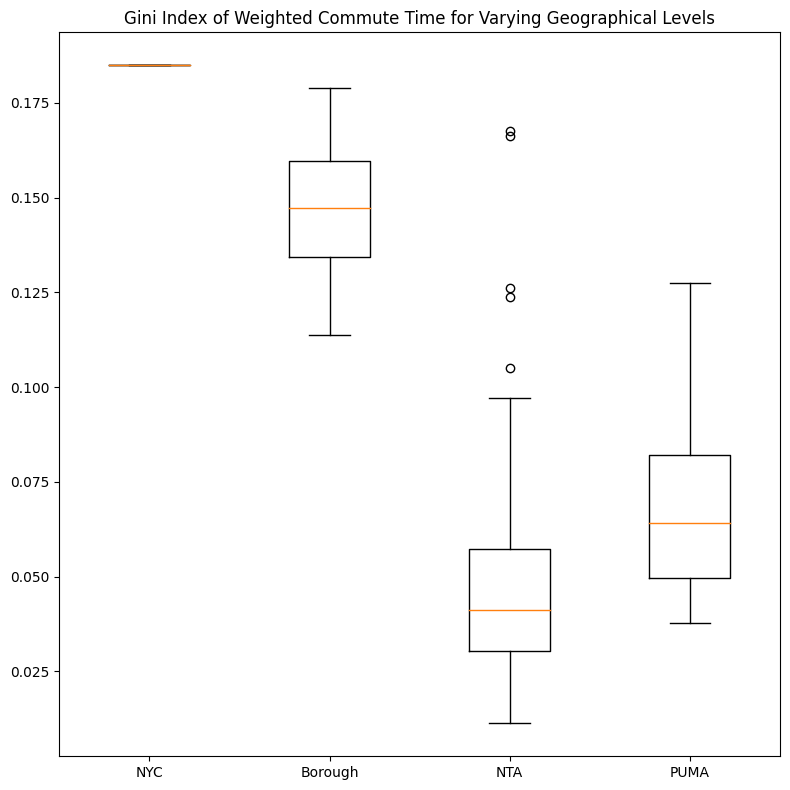

In [71]:
fig = plt.figure(figsize =(8, 8))
 
# Creating axes instance
ax = fig.add_subplot(111) 
# Creating plot
bp = ax.boxplot(weighted_ginis)
ax.set_xticklabels(['NYC','Borough','NTA','PUMA'])
ax.set_title('Gini Index of Weighted Commute Time for Varying Geographical Levels')
plt.tight_layout()
plt.savefig('../Outputs/gini_boxplot_wtt.png')
# show plot
plt.show()

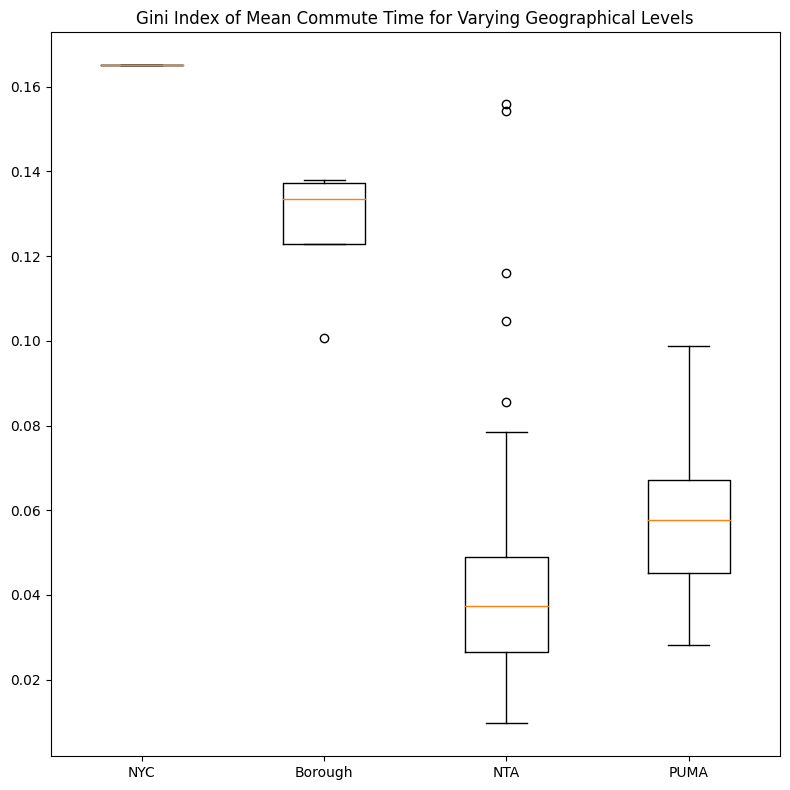

In [73]:
fig = plt.figure(figsize =(8, 8))
 
# Creating axes instance
ax = fig.add_subplot(111) 
# Creating plot
bp = ax.boxplot(mean_ginis)
ax.set_xticklabels(['NYC','Borough','NTA','PUMA'])
ax.set_title('Gini Index of Mean Commute Time for Varying Geographical Levels')
plt.tight_layout()
plt.savefig('../Outputs/gini_boxplot_meantt.png')
# show plot
plt.show()

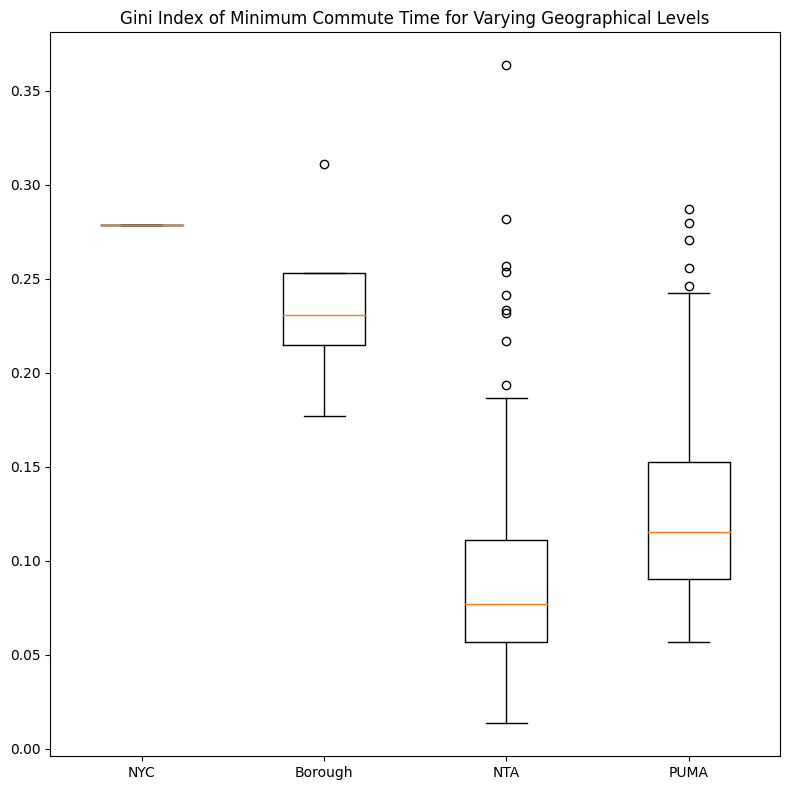

In [74]:
fig = plt.figure(figsize =(8, 8))
 
# Creating axes instance
ax = fig.add_subplot(111) 
# Creating plot
bp = ax.boxplot(min_ginis)
ax.set_xticklabels(['NYC','Borough','NTA','PUMA'])
ax.set_title('Gini Index of Minimum Commute Time for Varying Geographical Levels')
plt.tight_layout()
plt.savefig('../Outputs/gini_boxplot_mintt.png')
# show plot
plt.show()